## Modulos

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

----------------------------------------------

## Cargando dataset

In [2]:
df = pd.read_csv('diabetes_transform.txt', sep='|')

In [3]:
print(df.shape)

(442, 13)


In [4]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,age_group,bmi_group
0,59.0,Female,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0,Adulto,Obesidad_leve
1,48.0,Male,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0,Adulto,Peso_normal
2,72.0,Female,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0,Anciano,Obesidad_leve
3,24.0,Male,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0,Joven,Sobrepeso
4,50.0,Male,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0,Adulto,Peso_normal


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        442 non-null    float64
 1   sex        442 non-null    object 
 2   bmi        442 non-null    float64
 3   bp         442 non-null    float64
 4   s1         442 non-null    float64
 5   s2         442 non-null    float64
 6   s3         442 non-null    float64
 7   s4         442 non-null    float64
 8   s5         442 non-null    float64
 9   s6         442 non-null    float64
 10  target     442 non-null    float64
 11  age_group  442 non-null    object 
 12  bmi_group  442 non-null    object 
dtypes: float64(10), object(3)
memory usage: 45.0+ KB


----------------------------------------------

## Correlación

In [6]:
corr = df.corr(numeric_only=True)
corr

,age,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
bmi,0.185085,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483
target,0.187889,0.586450,0.441482,0.212022,0.174054,-0.394789,0.430453,0.565883,0.382483,1.000000


<Axes: >

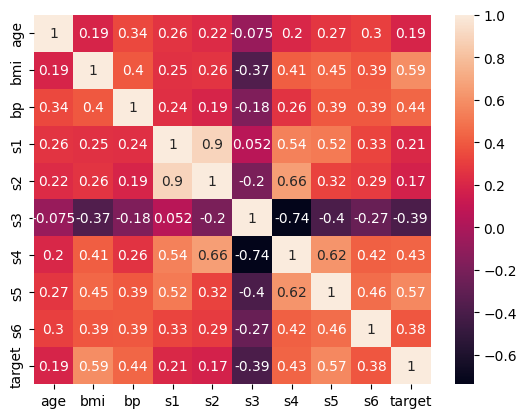

In [7]:
sns.heatmap(corr, annot=True)

-------------------------------------------

## Modelo simple de regresión

In [28]:
X_train = np.array(df[['bmi']])
y_train = np.array(df['target'])

# Creamos el objeto de Regresión Linear
regr = LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [10.23312787]
Independent term: 
 -117.77336656656527
Mean squared error: 3890.46
Variance score: 0.34


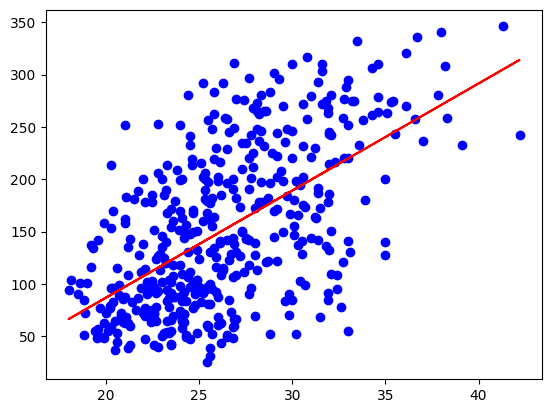

In [29]:
plt.scatter(X_train, y_train, color="blue")

plt.plot(X_train, y_pred, color="red")
plt.show()